# Diana Angélica Martínez Hernández
# Alberto Isaac Pico Lara
## Proyecto final de Minería de Datos

#### Librerías necesarias para exploración y tratamiento de datos

In [81]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from random import randint
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display  import Audio
from sklearn import preprocessing
import seaborn as sns
import missingno as msno

#### Ruta a los archivos de audio de cada uno de los géneros (Prog, Salsa, Electro) y creación de listas con los nombres de los archivos en cada ruta, así como una lista que contenga todas las pistas

In [82]:
ruta_prog = '..\prog'
pistas_p = os.listdir(ruta_prog)
ruta_salsa = '..\salsa'
pistas_s = os.listdir(ruta_salsa)
ruta_electro = '..\electronica'
pistas_e = os.listdir(ruta_electro)
pistas_unif = pistas_p + pistas_s + pistas_e
generos = ['prog', 'salsa', 'electronica']

In [83]:
print('# de pistas prog: ', len(pistas_p))
print('# de pistas de Salsa: ', len(pistas_s))
print('# de pistas de electro: ', len(pistas_e))
print('# total de pistas:', len(pistas_unif))

# de pistas prog:  130
# de pistas de Salsa:  130
# de pistas de electro:  130
# total de pistas: 390


### Ejemplos de análisis de una pista aleatoria por cada género

In [84]:
a = randint(0, 129)

In [85]:
samples_p, sr_p = librosa.load(ruta_prog + '\\' + pistas_p[a], sr = None, mono = True, offset = 0.0, duration = None)
samples_s, sr_s = librosa.load(ruta_salsa + '\\' + pistas_s[a], sr = None, mono = True, offset = 0.0, duration = None)
samples_e, sr_e = librosa.load(ruta_electro + '\\' + pistas_e[a], sr = None, mono = True, offset = 0.0, duration = None)

d:\desarrollo\python\virtualpythonprincipal\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [86]:
print('Tamaño de muestreo (samples) prog: ', len(samples_p))
print('Tasa de muestreo (sampling rate) prog: ', sr_p)
print('Tamaño de muestreo (samples) salsa: ', len(samples_s))
print('Tasa de muestreo (sampling rate) salsa: ', sr_s)
print('Tamaño de muestreo (samples) electro: ', len(samples_e))
print('Tasa de muestreo (sampling rate) electro: ', sr_e)

Tamaño de muestreo (samples) prog:  2646144
Tasa de muestreo (sampling rate) prog:  44100
Tamaño de muestreo (samples) salsa:  2638080
Tasa de muestreo (sampling rate) salsa:  44100
Tamaño de muestreo (samples) electro:  2641536
Tasa de muestreo (sampling rate) electro:  44100


#### Pistas cargadas

In [87]:
print(pistas_p[a])

05 The Pot_02m_00s__03m_00s.mp3


In [88]:
Audio(ruta_prog + '\\' + pistas_p[a])

Text(0.5, 1.0, '05 The Pot_02m_00s__03m_00s.mp3')

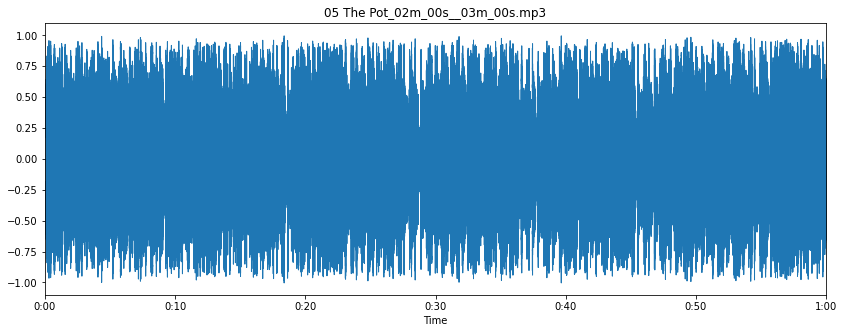

In [89]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples_p, sr = sr_p)
plt.title(pistas_p[a])

Text(0.5, 1.0, '05 The Pot_02m_00s__03m_00s.mp3')

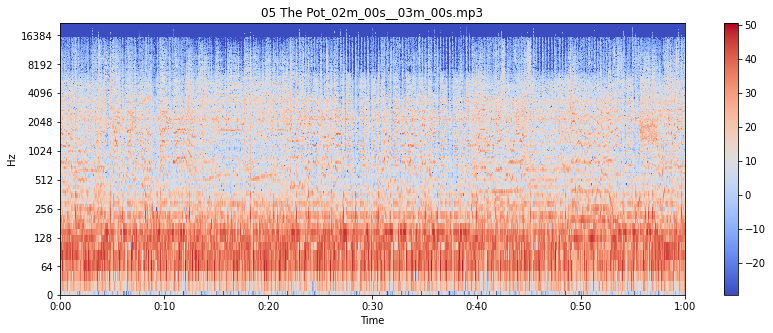

In [90]:
X = librosa.stft(samples_p)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr_p, x_axis='time', y_axis='log')
plt.colorbar()
plt.title(pistas_p[a])

In [91]:
print(pistas_s[a])

ADAN GARCIA-RUBEN BLADES_01m_00s__02m_00s.mp3


In [92]:
Audio(ruta_salsa + '\\' + pistas_s[a])

Text(0.5, 1.0, 'ADAN GARCIA-RUBEN BLADES_01m_00s__02m_00s.mp3')

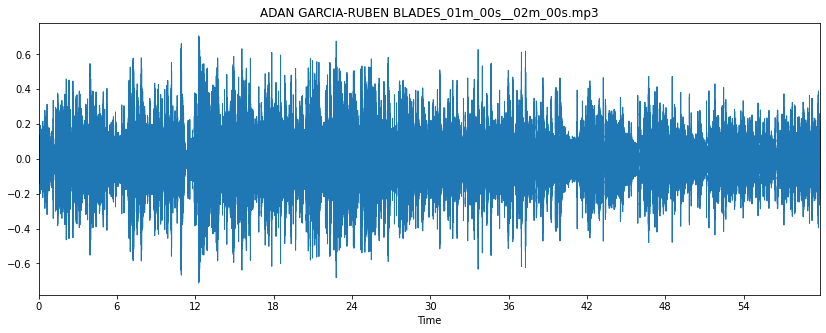

In [93]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples_s, sr = sr_s)
plt.title(pistas_s[a])

Text(0.5, 1.0, 'ADAN GARCIA-RUBEN BLADES_01m_00s__02m_00s.mp3')

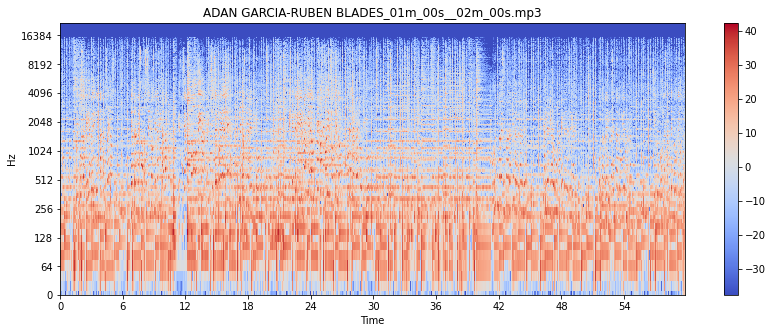

In [94]:
X = librosa.stft(samples_s)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr_s, x_axis='time', y_axis='log')
plt.colorbar()
plt.title(pistas_s[a])

In [95]:
print(pistas_e[a])

Free The Madness_01m_00s__02m_00s.mp3


In [96]:
Audio(ruta_electro + '\\' + pistas_e[a])

Text(0.5, 1.0, 'Free The Madness_01m_00s__02m_00s.mp3')

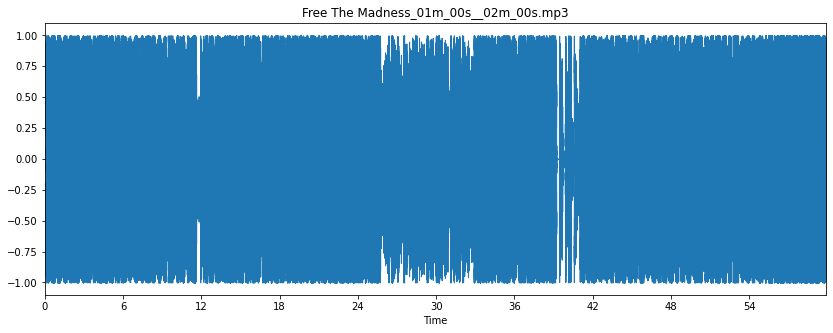

In [97]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples_e, sr = sr_e)
plt.title(pistas_e[a])

Text(0.5, 1.0, 'Free The Madness_01m_00s__02m_00s.mp3')

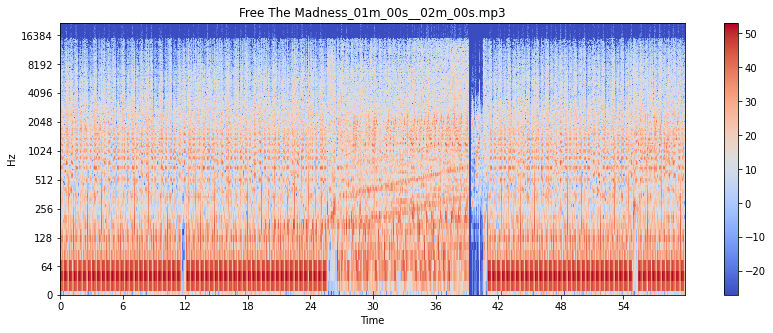

In [98]:
X = librosa.stft(samples_e)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr_e, x_axis='time', y_axis='log')
plt.colorbar()
plt.title(pistas_e[a])

### Selección de características ejemplo
Algunas de las caracerísticas que se pueden extraer del audio son las siguientes:
#### Característica espectrales del audio
- Zero crossing rate: tasa de cambios de signo a través de una señal
- Spectral centroid: Indica en donde está el "centro de masa" (mayor sendidad de muestras) de una pista de audio
- Spectrall Roll off: La medida de la forma de la señal, representa la frecuencia de la señal debajo de un porcentaje especifico.
- Spectral Bandwidth, ancho de banda espectral de la señal de audio.
- Mel Frequency cepstral coeficients: los MFCC de una señal son sunconjuntos de características que describen de manera concisa la forma general del espectro. Esta técnica se usa para el análisis de la voz humana 
- Chroma frequencies: Representación de los 12 semitonos que existen en la octava musical
#### Características rítmicas
- Tempograma: Estimación de los BPM de cada pista

En las siguientes líneas se muestra con una pista ejemplo la extracción y visualización de una pista, más adelante se les hará la extracción a las 390 pistas que forman parte del conjunto de datos elegido.

Text(0.5, 1.0, '05 The Pot_02m_00s__03m_00s.mp3')

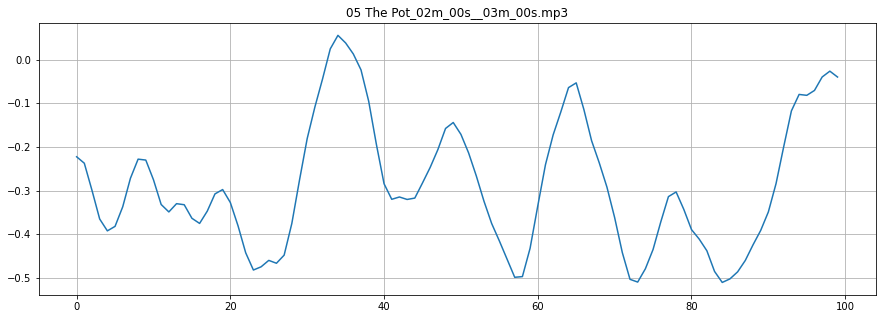

In [99]:
#Zero crossing rate
n0 = 9000
n1 = 9100
plt.figure(figsize=(15, 5))
plt.plot(samples_p[n0:n1])
plt.grid()
plt.title(pistas_p[a])

A simple vista se aprecian 3 cruces con el 0, se verifica con la lbrería librosa

In [100]:
zero_crossings= librosa.zero_crossings(samples_p[n0:n1], pad=False)
print(np.mean(zero_crossings))
print(sum(zero_crossings))

samples_p

0.02
2


array([0.        , 0.        , 0.        , ..., 0.19543457, 0.25151062,
       0.27941895], dtype=float32)

In [101]:
#spectral centroid, calcula el crentoide espectral para cada cuadro de la señal
spectral_centroids = librosa.feature.spectral_centroid(samples_p, sr=sr_p)[0]
spectral_centroids.shape

(5169,)

In [102]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

In [103]:
def normalize(x, axis = 0):
    return preprocessing.minmax_scale(x, axis = axis)

Text(0.5, 1.0, '05 The Pot_02m_00s__03m_00s.mp3')

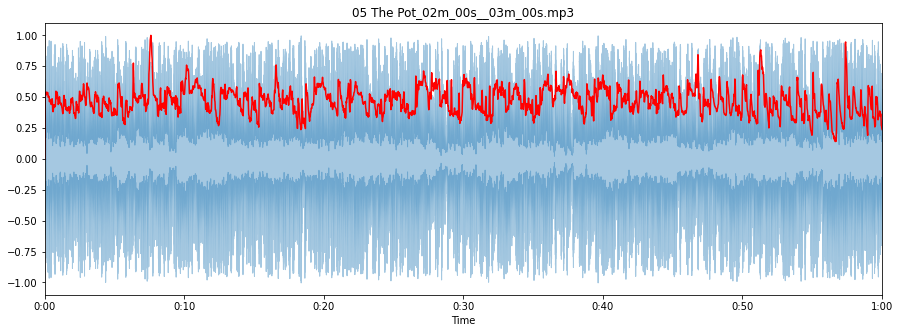

In [104]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(samples_p, sr=sr_p, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.title(pistas_p[a])

Text(0.5, 1.0, '05 The Pot_02m_00s__03m_00s.mp3')

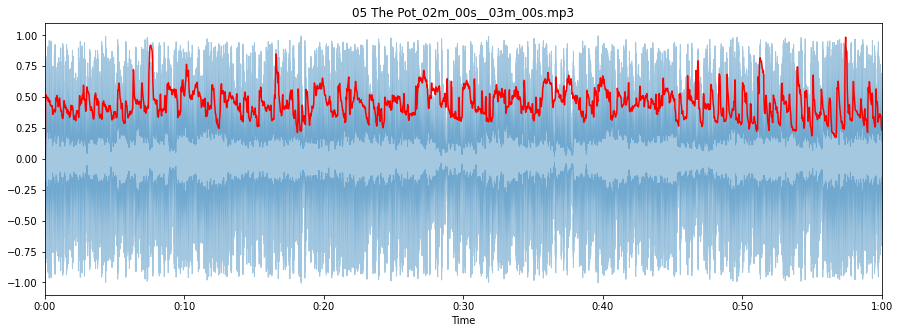

In [105]:
#spectral rolloff
spr = librosa.feature.spectral_rolloff(samples_p+0.01, sr = sr_p)[0]
plt.figure(figsize=(15, 5))
librosa.display.waveplot(samples_p, sr = sr_p, alpha = 0.4)
plt.plot(t, normalize(spr), color = 'r')
plt.title(pistas_p[a])

In [106]:
#MFCC
mfccs = librosa.feature.mfcc(samples_p, sr = sr_p)
mfccs.shape

(20, 5169)

In [107]:
#20 MFCC en 5,171 cuadros

Text(0.5, 1.0, '05 The Pot_02m_00s__03m_00s.mp3')

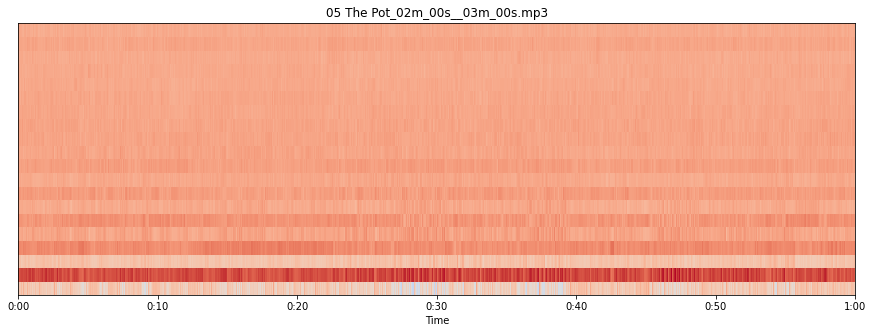

In [108]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, sr=sr_p, x_axis='time')
plt.title(pistas_p[a])

Text(0.5, 1.0, '05 The Pot_02m_00s__03m_00s.mp3')

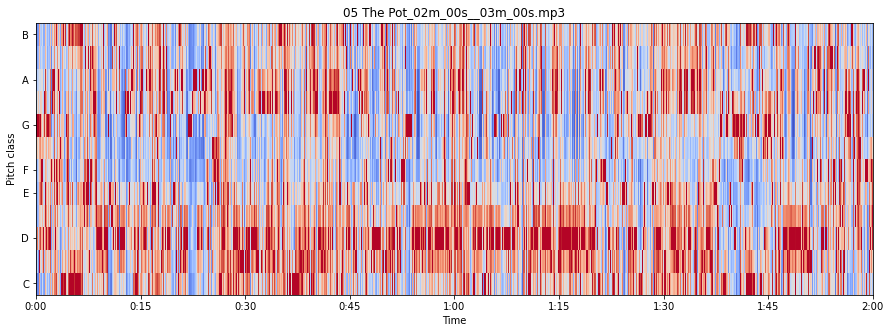

In [109]:
#Chroma frequencies: representación de la escala cromática en 12 semitonos
salto = 512
cromatica = librosa.feature.chroma_stft(samples_p, sr=sr_p, hop_length=salto)
plt.figure(figsize=(15, 5))
librosa.display.specshow(cromatica, x_axis='time', y_axis='chroma', hop_length=salto, cmap='coolwarm')
plt.title(pistas_p[a])

In [110]:
%%time
#Temmpograma
hop_length = 512
env = librosa.onset.onset_strength(y = samples_p, sr = sr_p, hop_length = hop_length)
tempograma = librosa.feature.tempogram(onset_envelope = env, sr = sr_p, hop_length = hop_length)

auto_c = librosa.autocorrelate(env, max_size = tempograma.shape[0])
auto_c = librosa.util.normalize(auto_c)

#mostrar los "beats"
tempo = librosa.beat.tempo(onset_envelope = env, sr = sr_p, hop_length = hop_length)[0]
print(tempo)
print(auto_c.shape)
print(np.mean(auto_c))

143.5546875
(384,)
0.6100536042310876
Wall time: 1.91 s


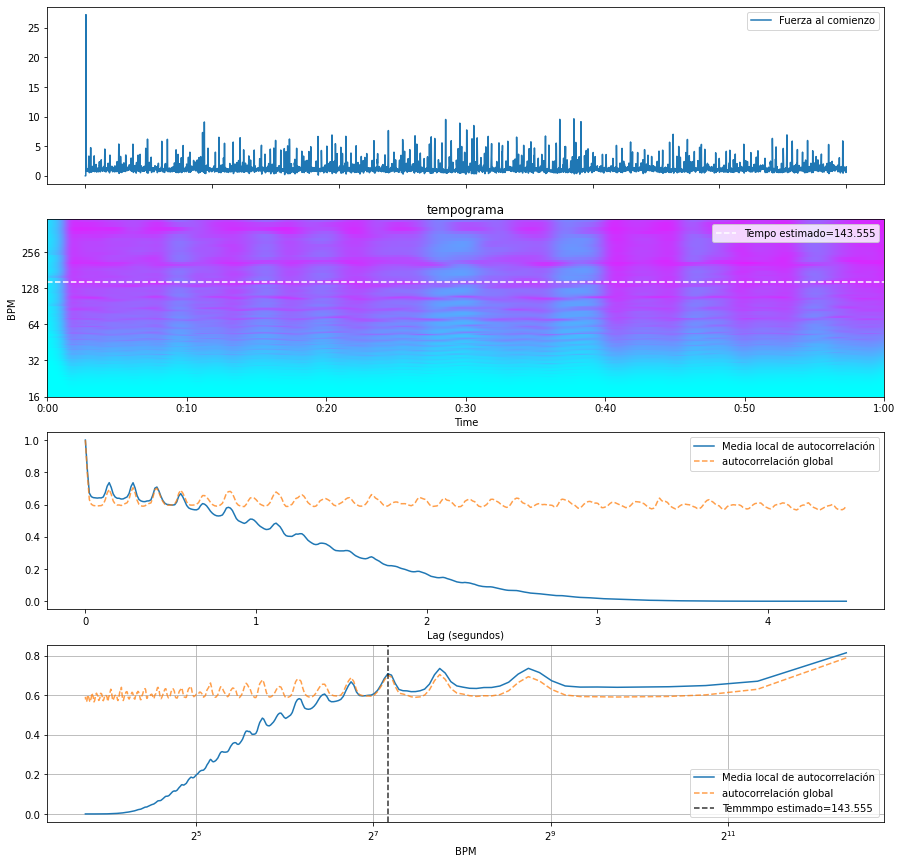

In [111]:
fig, ax = plt.subplots(nrows=4, figsize=(15, 15))
tiempos = librosa.times_like(env, sr=sr_p, hop_length=hop_length)
ax[0].plot(tiempos, env, label='Fuerza al comienzo')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempograma, sr=sr_p, hop_length=hop_length,x_axis='time', y_axis='tempo', cmap='cool',ax=ax[1])
ax[1].axhline(tempo, color='w', linestyle='--', alpha=1,label='Tempo estimado={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='tempograma')
x = np.linspace(0, tempograma.shape[0] * float(hop_length) / sr_p,num=tempograma.shape[0])
ax[2].plot(x, np.mean(tempograma, axis=1), label='Media local de autocorrelación')
ax[2].plot(x, auto_c, '--', alpha=0.75, label='autocorrelación global')
ax[2].set(xlabel='Lag (segundos)')
ax[2].legend(frameon=True)
freqs = librosa.tempo_frequencies(tempograma.shape[0], hop_length=hop_length, sr=sr_p)
ax[3].semilogx(freqs[1:], np.mean(tempograma[1:], axis=1),label='Media local de autocorrelación', basex=2)
ax[3].semilogx(freqs[1:], auto_c[1:], '--', alpha=0.75,label='autocorrelación global', basex=2)
ax[3].axvline(tempo, color='black', linestyle='--', alpha=.8,label='Temmmpo estimado={:g}'.format(tempo))
ax[3].legend(frameon=True)
ax[3].set(xlabel='BPM')
ax[3].grid(True)

Text(0.5, 1.0, 'tempograma de 05 The Pot_02m_00s__03m_00s.mp3')

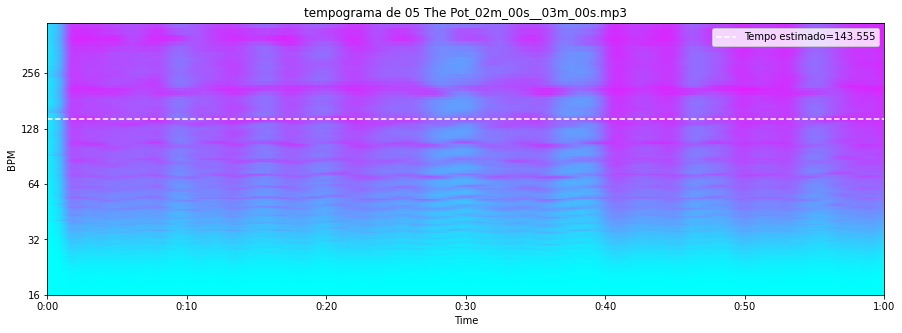

In [112]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(tempograma, sr=sr_p, hop_length=hop_length,x_axis='time', y_axis='tempo', cmap='cool')
plt.axhline(tempo, color='w', linestyle='--', alpha=1,label='Tempo estimado={:g}'.format(tempo))
plt.legend(loc='upper right')
plt.title('tempograma de ' + pistas_p[a])

## Extraer expectrograma de cada canción

In [113]:
import pathlib

## Extraer características de cada canción

### Importación de de dataset generado

In [114]:
pd.set_option('display.max_columns',500)

In [115]:
a = '..\\data_set\\datos_musica.csv'

In [116]:
df = pd.read_csv(a, sep = ',', encoding = 'utf8')

In [117]:
df.head()

Unnamed: 0                                      archivo  zero_cr  \
0           0          01-TheMountain_02m_00s__03m_00s.mp3        6   
1           1  01ANightmareToRemember_02m_00s__03m_00s.mp3        4   
2           2              01AcidRain_02m_00s__03m_00s.mp3        5   
3           3          01BalrogBoogie_02m_00s__03m_00s.mp3        2   
4           4            01C'estlaVie_02m_00s__03m_00s.mp3        5   

   zero_crossings_m  spectral_centroid  spectral_bw  spectral_rf     croma  \
0              0.06        2358.978044  2552.823890  4793.526802  0.470420   
1              0.04        3100.689109  3256.578868  6469.363992  0.596201   
2              0.05        3198.378355  3543.702522  6808.570540  0.546079   
3              0.02        2942.011868  3163.903990  6050.917527  0.433330   
4              0.05        3123.743239  3337.527859  6499.844646  0.535730   

       mfcc_1      mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6  \
0 -163.372833  165.717529 -50.697205  13.083968  -0.032861  16.523687   
1  -48.062439  135.743393 -53.932007  63.562389  -6.626508  33.995968   
2  -58.244419  134.549545 -35.384872  52.873055  -5.400178  27.031818   
3  -91.082634  134.391296 -46.598930  44.523190  -2.545116  30.069979   
4  -34.448353  137.779984 -48.767544  63.001434 -11.798602  31.900543   

      mfcc_7     mfcc_8    mfcc_9    mfcc_10   mfcc_11   mfcc_12   mfcc_13  \
0 -10.634155  13.878497 -0.156555   4.318977  1.155136  3.123753  3.154028   
1  -5.462245  21.089064  0.379193  13.363898 -0.915789  8.659492  1.639240   
2 -12.117587  20.233650 -8.962458  10.447237 -4.707659  7.385719 -0.928300   
3  -9.316360  17.695271 -0.801928   9.089577 -1.713330  8.924645  4.266488   
4 -13.216450  19.975677 -6.714272  13.966826  0.649572  8.866032  1.035663   

    mfcc_14   mfcc_15   mfcc_16   mfcc_17   mfcc_18   mfcc_19   mfcc_20  \
0  3.419914  1.201207 -3.672799  1.497480  0.186496  0.511725 -5.180268   
1  5.244628  1.330808 -2.682353  0.532447 -1.862646  1.804187 -5.636509   
2  4.593798  1.471745  0.739590  0.728077 -4.671610  3.458641 -1.755218   
3  2.395693  1.147897  1.289821 -0.101062 -4.962541  3.051191 -2.858684   
4  3.280222  3.242964 -4.131340  1.912559 -6.067165  2.728408 -6.114751   

          BPM    auto_c genero  
0  123.046875  0.772140   prog  
1  109.956782  0.628546   prog  
2  143.554688  0.541958   prog  
3   90.666118  0.541528   prog  
4  120.185320  0.746078   prog

In [118]:
df.tail()

Unnamed: 0                                            archivo  zero_cr  \
385         385             WhenLoveTakesOver_01m_00s__02m_00s.mp3        6   
386         386  WhenTheFunkDrops(OriginalMix)_01m_00s__02m_00s...       15   
387         387                     Wintermix_01m_00s__02m_00s.mp3       19   
388         388                           Yee_01m_00s__02m_00s.mp3        0   
389         389                     YouMakeMe_01m_00s__02m_00s.mp3        7   

     zero_crossings_m  spectral_centroid  spectral_bw  spectral_rf     croma  \
385              0.06        2575.123693  3005.389688  5564.092052  0.502320   
386              0.15        3718.115177  3493.782363  7626.795035  0.567823   
387              0.19        3864.484272  3947.200355  8519.525400  0.480503   
388              0.00        3332.281145  3467.253378  7298.074751  0.431944   
389              0.07        3591.624189  3709.409154  7548.133606  0.477659   

         mfcc_1      mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6  \
385 -188.561890  145.575531 -41.501461  47.843094 -11.712511  28.348310   
386  -58.652626  105.322052 -53.181622  43.308205 -22.160574  26.726955   
387  -58.399002  118.087608 -31.061525  51.545441 -24.027578  36.409058   
388 -105.453407  114.252968 -18.881662  36.844822 -18.484241  33.493614   
389   -1.158877  123.738770 -36.778862  40.367935 -19.889458  27.192369   

        mfcc_7     mfcc_8     mfcc_9    mfcc_10   mfcc_11   mfcc_12   mfcc_13  \
385  -7.600820  13.613605   2.732146   2.947855  3.605409  6.848191  2.274838   
386 -12.496088  22.249159  -1.509698   8.357769 -4.032179  5.886038  2.767959   
387 -21.325958  20.040140 -15.393820   9.397675 -6.469026  4.237088 -3.188266   
388  -6.559953  18.577913  -5.552446   9.160286 -7.346992 -3.262074 -8.601421   
389 -11.229925  18.227455  -4.435206  13.120482 -1.195981  6.046183  0.015581   

      mfcc_14   mfcc_15   mfcc_16   mfcc_17   mfcc_18   mfcc_19   mfcc_20  \
385 -2.674485  5.352834 -0.206322  3.039914 -2.498269  2.183645 -1.435693   
386  2.678487  2.477016 -1.815939  5.377456 -3.577778  7.179162 -2.833043   
387  0.903239  3.566648 -0.357372  5.836795 -2.829212  2.148330 -6.471159   
388 -8.937236 -4.173946 -4.352620  5.287313 -0.805680  5.677492 -4.592224   
389 -0.324959  0.980846 -4.326663  4.134473 -4.238715  6.130796 -1.494782   

            BPM    auto_c       genero  
385  129.199219  0.572574  electronica  
386  129.199219  0.389928  electronica  
387  129.199219  0.530109  electronica  
388  129.199219  0.467498  electronica  
389  129.199219  0.664809  electronica

In [119]:
var = list(df.columns)

In [120]:
var

['Unnamed: 0',
 'archivo',
 'zero_cr',
 'zero_crossings_m',
 'spectral_centroid',
 'spectral_bw',
 'spectral_rf',
 'croma',
 'mfcc_1',
 'mfcc_2',
 'mfcc_3',
 'mfcc_4',
 'mfcc_5',
 'mfcc_6',
 'mfcc_7',
 'mfcc_8',
 'mfcc_9',
 'mfcc_10',
 'mfcc_11',
 'mfcc_12',
 'mfcc_13',
 'mfcc_14',
 'mfcc_15',
 'mfcc_16',
 'mfcc_17',
 'mfcc_18',
 'mfcc_19',
 'mfcc_20',
 'BPM',
 'auto_c',
 'genero']

In [121]:
del(df['Unnamed: 0'])

### Exploración

In [122]:
df.head()

archivo  zero_cr  zero_crossings_m  \
0          01-TheMountain_02m_00s__03m_00s.mp3        6              0.06   
1  01ANightmareToRemember_02m_00s__03m_00s.mp3        4              0.04   
2              01AcidRain_02m_00s__03m_00s.mp3        5              0.05   
3          01BalrogBoogie_02m_00s__03m_00s.mp3        2              0.02   
4            01C'estlaVie_02m_00s__03m_00s.mp3        5              0.05   

   spectral_centroid  spectral_bw  spectral_rf     croma      mfcc_1  \
0        2358.978044  2552.823890  4793.526802  0.470420 -163.372833   
1        3100.689109  3256.578868  6469.363992  0.596201  -48.062439   
2        3198.378355  3543.702522  6808.570540  0.546079  -58.244419   
3        2942.011868  3163.903990  6050.917527  0.433330  -91.082634   
4        3123.743239  3337.527859  6499.844646  0.535730  -34.448353   

       mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6     mfcc_7  \
0  165.717529 -50.697205  13.083968  -0.032861  16.523687 -10.634155   
1  135.743393 -53.932007  63.562389  -6.626508  33.995968  -5.462245   
2  134.549545 -35.384872  52.873055  -5.400178  27.031818 -12.117587   
3  134.391296 -46.598930  44.523190  -2.545116  30.069979  -9.316360   
4  137.779984 -48.767544  63.001434 -11.798602  31.900543 -13.216450   

      mfcc_8    mfcc_9    mfcc_10   mfcc_11   mfcc_12   mfcc_13   mfcc_14  \
0  13.878497 -0.156555   4.318977  1.155136  3.123753  3.154028  3.419914   
1  21.089064  0.379193  13.363898 -0.915789  8.659492  1.639240  5.244628   
2  20.233650 -8.962458  10.447237 -4.707659  7.385719 -0.928300  4.593798   
3  17.695271 -0.801928   9.089577 -1.713330  8.924645  4.266488  2.395693   
4  19.975677 -6.714272  13.966826  0.649572  8.866032  1.035663  3.280222   

    mfcc_15   mfcc_16   mfcc_17   mfcc_18   mfcc_19   mfcc_20         BPM  \
0  1.201207 -3.672799  1.497480  0.186496  0.511725 -5.180268  123.046875   
1  1.330808 -2.682353  0.532447 -1.862646  1.804187 -5.636509  109.956782   
2  1.471745  0.739590  0.728077 -4.671610  3.458641 -1.755218  143.554688   
3  1.147897  1.289821 -0.101062 -4.962541  3.051191 -2.858684   90.666118   
4  3.242964 -4.131340  1.912559 -6.067165  2.728408 -6.114751  120.185320   

     auto_c genero  
0  0.772140   prog  
1  0.628546   prog  
2  0.541958   prog  
3  0.541528   prog  
4  0.746078   prog

In [123]:
df.shape

(390, 30)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   archivo            390 non-null    object 
 1   zero_cr            390 non-null    int64  
 2   zero_crossings_m   390 non-null    float64
 3   spectral_centroid  390 non-null    float64
 4   spectral_bw        390 non-null    float64
 5   spectral_rf        390 non-null    float64
 6   croma              390 non-null    float64
 7   mfcc_1             390 non-null    float64
 8   mfcc_2             390 non-null    float64
 9   mfcc_3             390 non-null    float64
 10  mfcc_4             390 non-null    float64
 11  mfcc_5             390 non-null    float64
 12  mfcc_6             390 non-null    float64
 13  mfcc_7             390 non-null    float64
 14  mfcc_8             390 non-null    float64
 15  mfcc_9             390 non-null    float64
 16  mfcc_10            390 non

In [125]:
df.isnull().any().any()

False

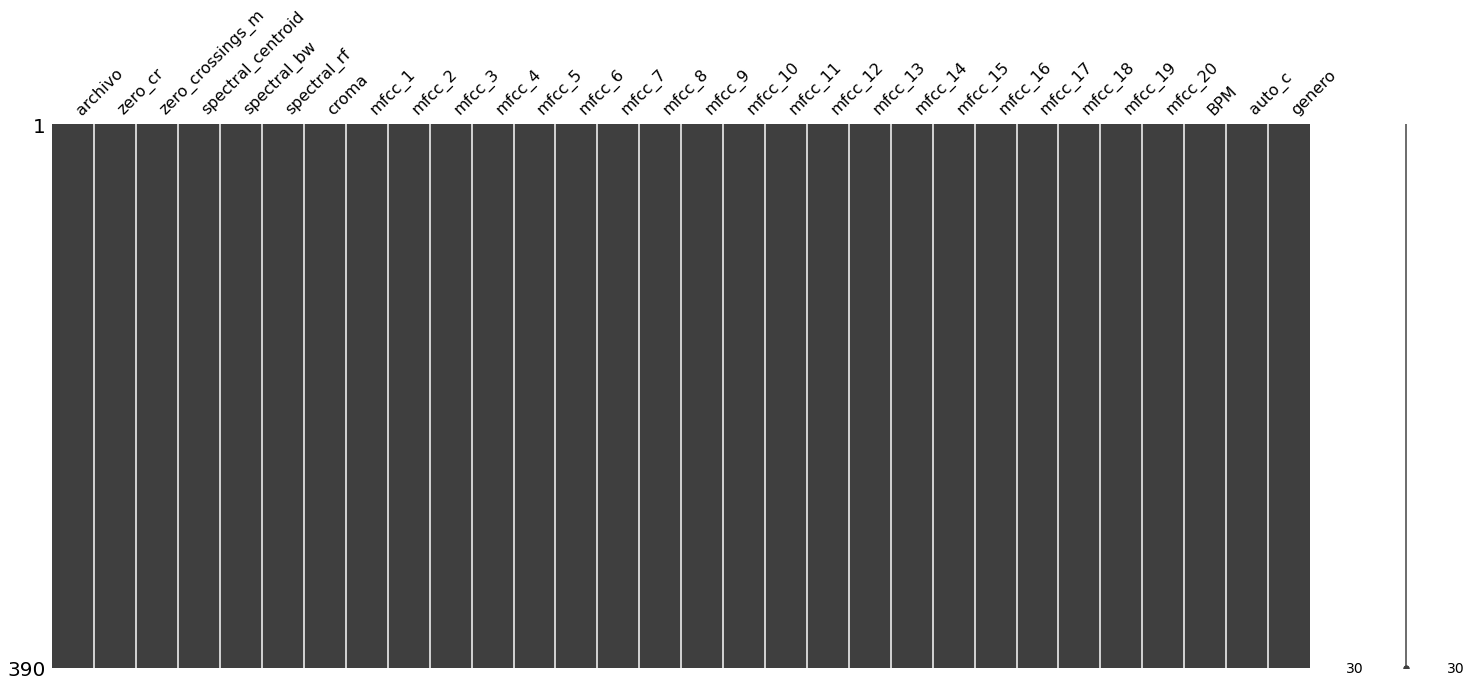

In [126]:
msno.matrix(df)

In [127]:
df.groupby('genero').mean()

zero_cr  zero_crossings_m  spectral_centroid  spectral_bw  \
genero                                                                    
electronica  7.715385          0.077154        3664.769823  3719.675979   
prog         4.892308          0.048923        2633.703679  2944.731812   
salsa        7.492308          0.074923        2866.901424  3039.036636   

             spectral_rf     croma      mfcc_1      mfcc_2     mfcc_3  \
genero                                                                  
electronica  7857.998810  0.532508  -65.689816  116.190062 -37.717804   
prog         5422.004875  0.520611 -121.510305  147.896507 -41.057114   
salsa        5855.439288  0.419100 -204.440593  140.781212 -40.942452   

                mfcc_4     mfcc_5     mfcc_6     mfcc_7     mfcc_8    mfcc_9  \
genero                                                                         
electronica  45.229312 -21.328018  31.227044 -13.062522  19.865181 -6.606800   
prog         46.850062   0.305706  26.756867  -6.182665  15.559259 -1.505437   
salsa        49.471140 -11.883951  22.663284 -11.767072  11.368040 -3.840248   

               mfcc_10   mfcc_11   mfcc_12   mfcc_13   mfcc_14   mfcc_15  \
genero                                                                     
electronica  11.919786 -2.089726  6.901863  2.001522  2.897985  3.759977   
prog          9.135088  0.658689  4.925011  1.455034  1.789769  1.790361   
salsa         1.848151 -1.951899  3.850634 -0.208070 -2.329010  2.166250   

              mfcc_16   mfcc_17   mfcc_18   mfcc_19   mfcc_20         BPM  \
genero                                                                      
electronica -0.840888  4.367829 -2.061035  5.707278 -2.616686  127.834031   
prog        -1.988850 -0.077769 -2.959955  1.395956 -4.444564  123.038354   
salsa       -3.473790  0.526125 -3.216435  1.328346 -5.358968  116.143151   

               auto_c  
genero                 
electronica  0.534869  
prog         0.622049  
salsa        0.468924

In [128]:
df_prog = df[df['genero'] == 'prog']
df_salsa = df[df['genero'] == 'salsa']
df_electro = df[df['genero'] == 'electronica']

<ipython-input-138-e01e4b21865d>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_prog.hist(ax = ax)


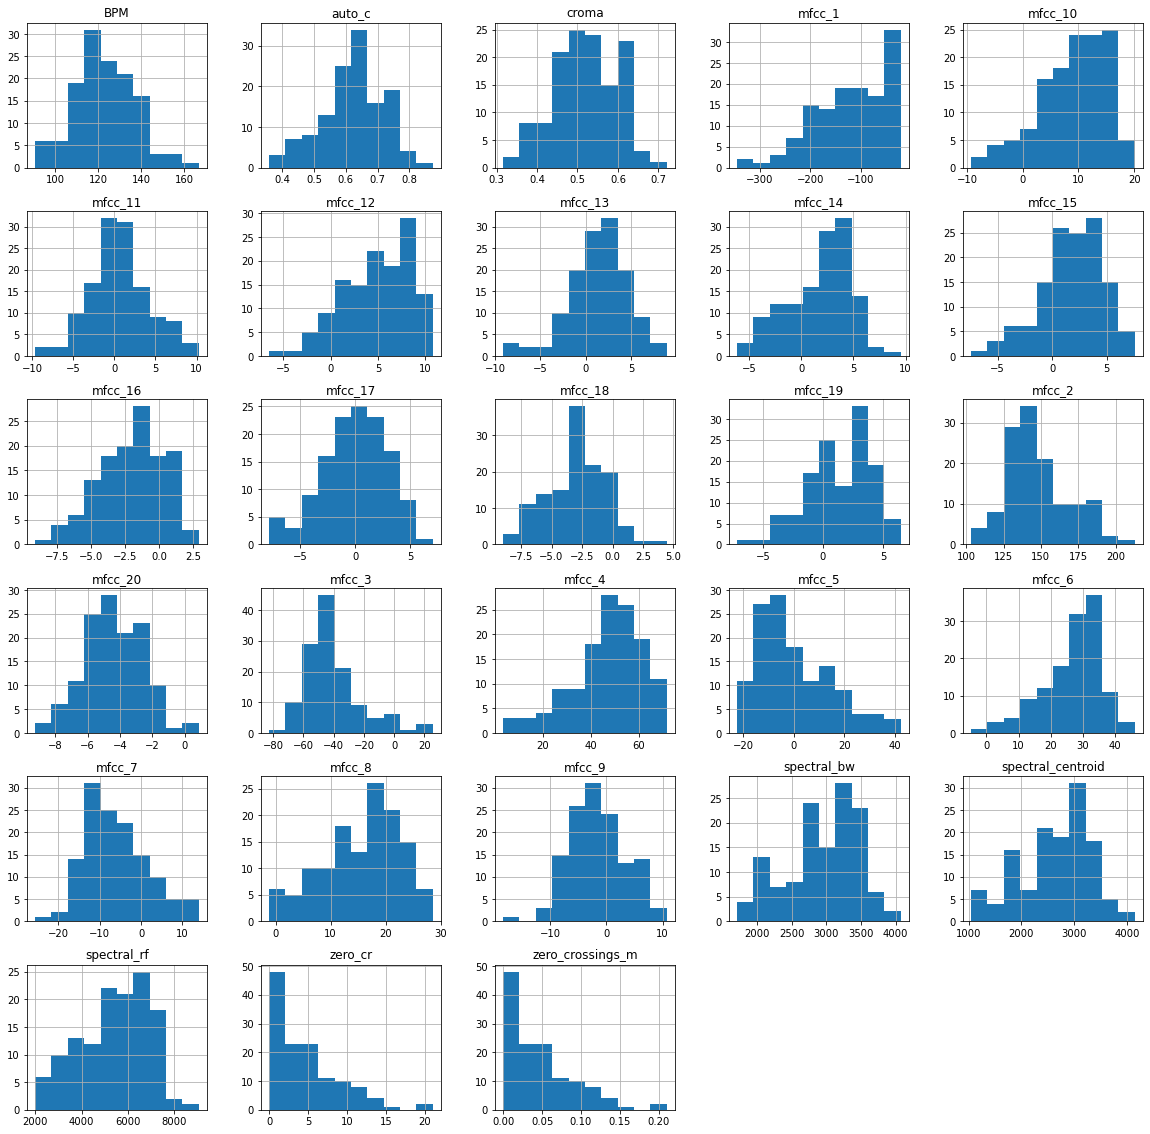

<Figure size 432x288 with 0 Axes>

In [138]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df_prog.hist(ax = ax)
plt.show()

<ipython-input-140-e4513636653b>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_salsa.hist(ax = ax)


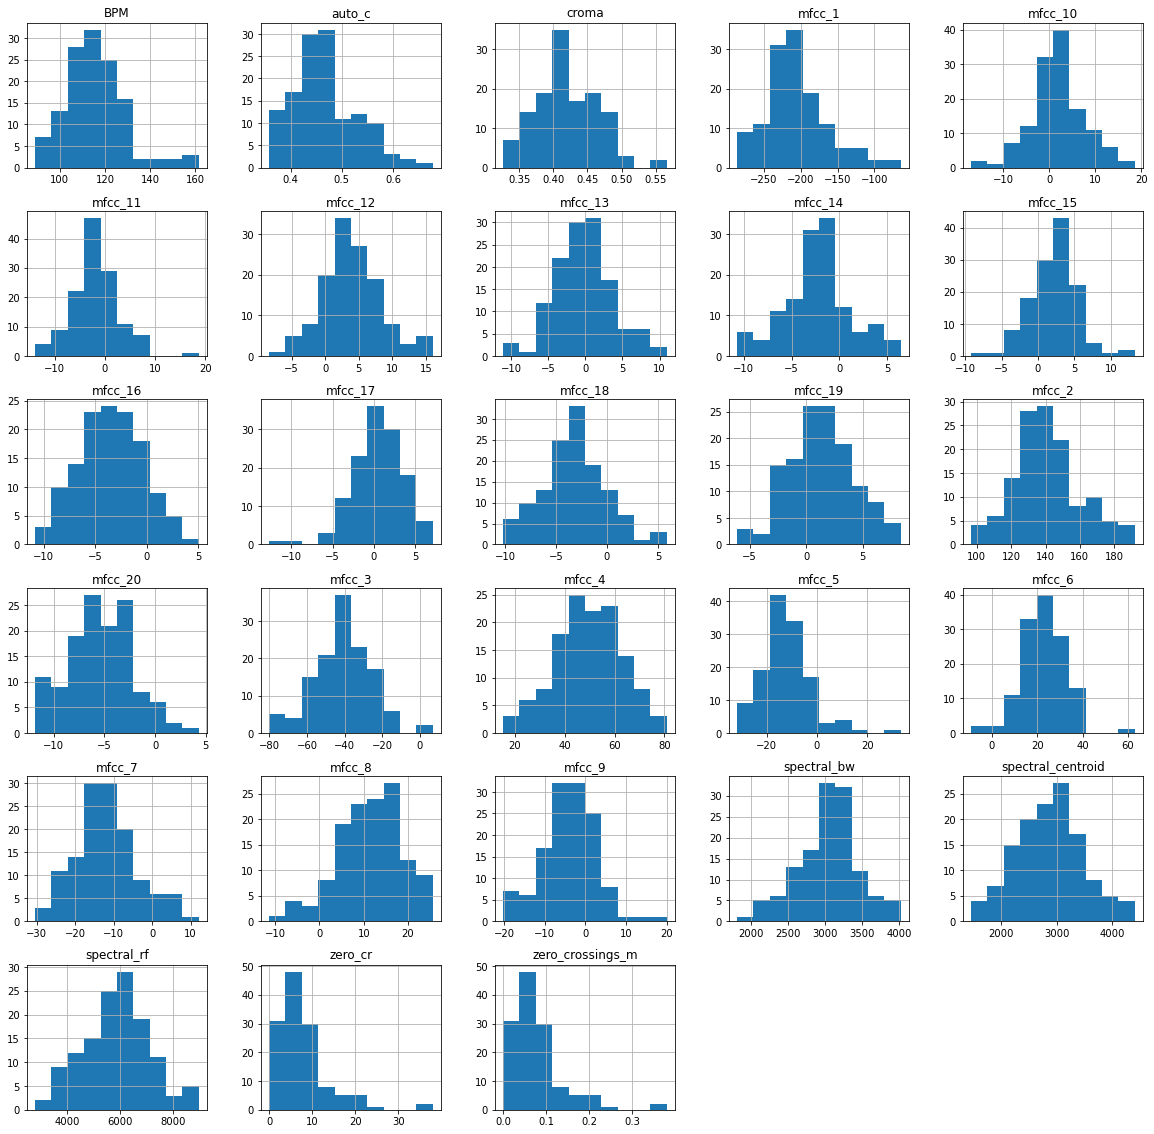

<Figure size 432x288 with 0 Axes>

In [140]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df_salsa.hist(ax = ax)
plt.show()

<ipython-input-141-6588579fce4a>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_electro.hist(ax = ax)


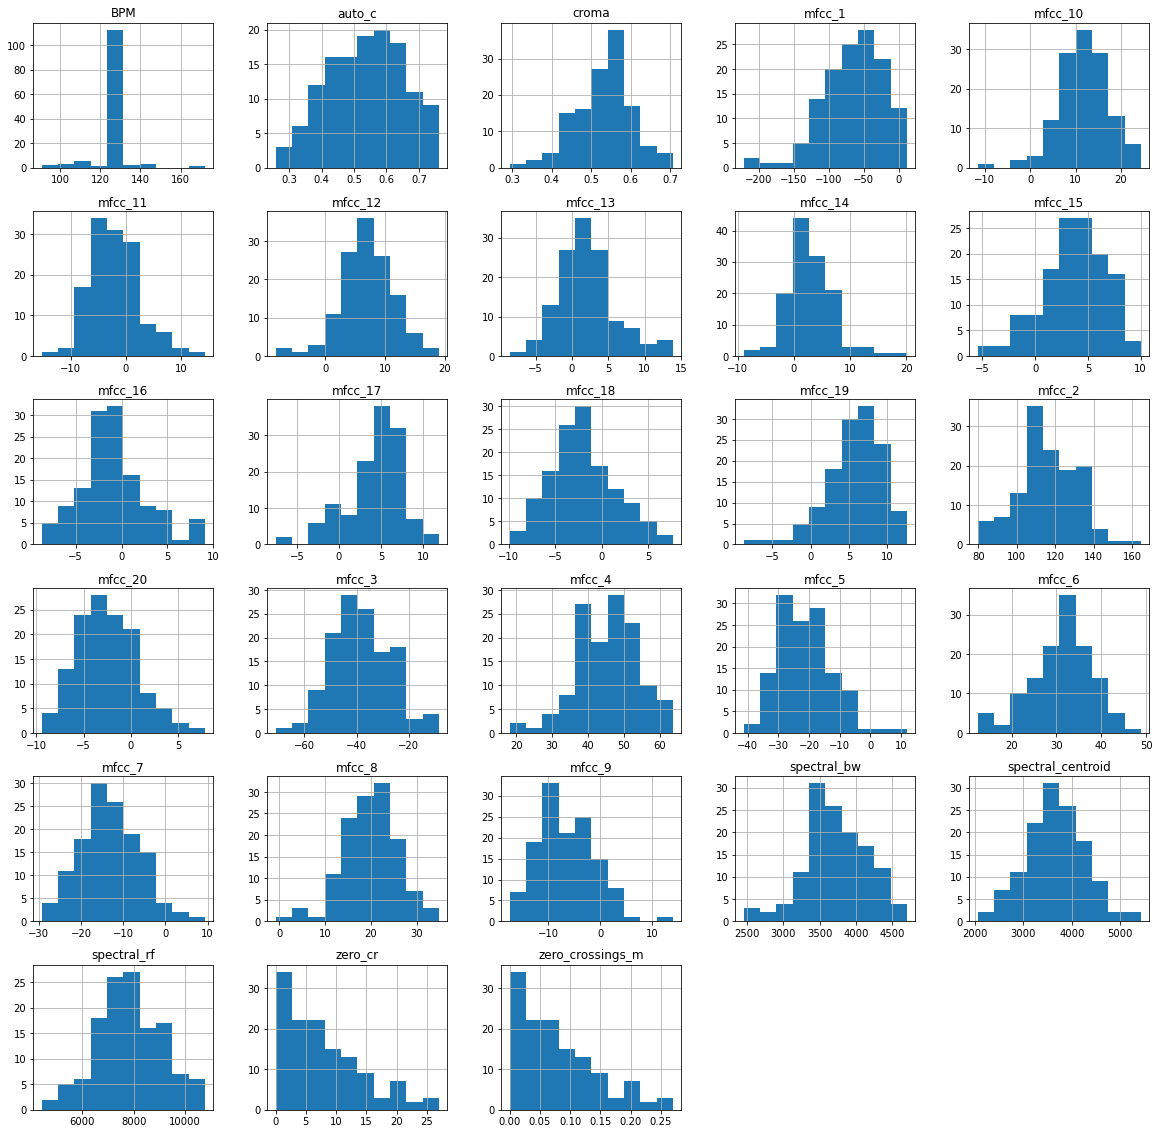

<Figure size 432x288 with 0 Axes>

In [141]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df_electro.hist(ax = ax)
plt.show()

<ipython-input-142-3d4109f8dcee>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


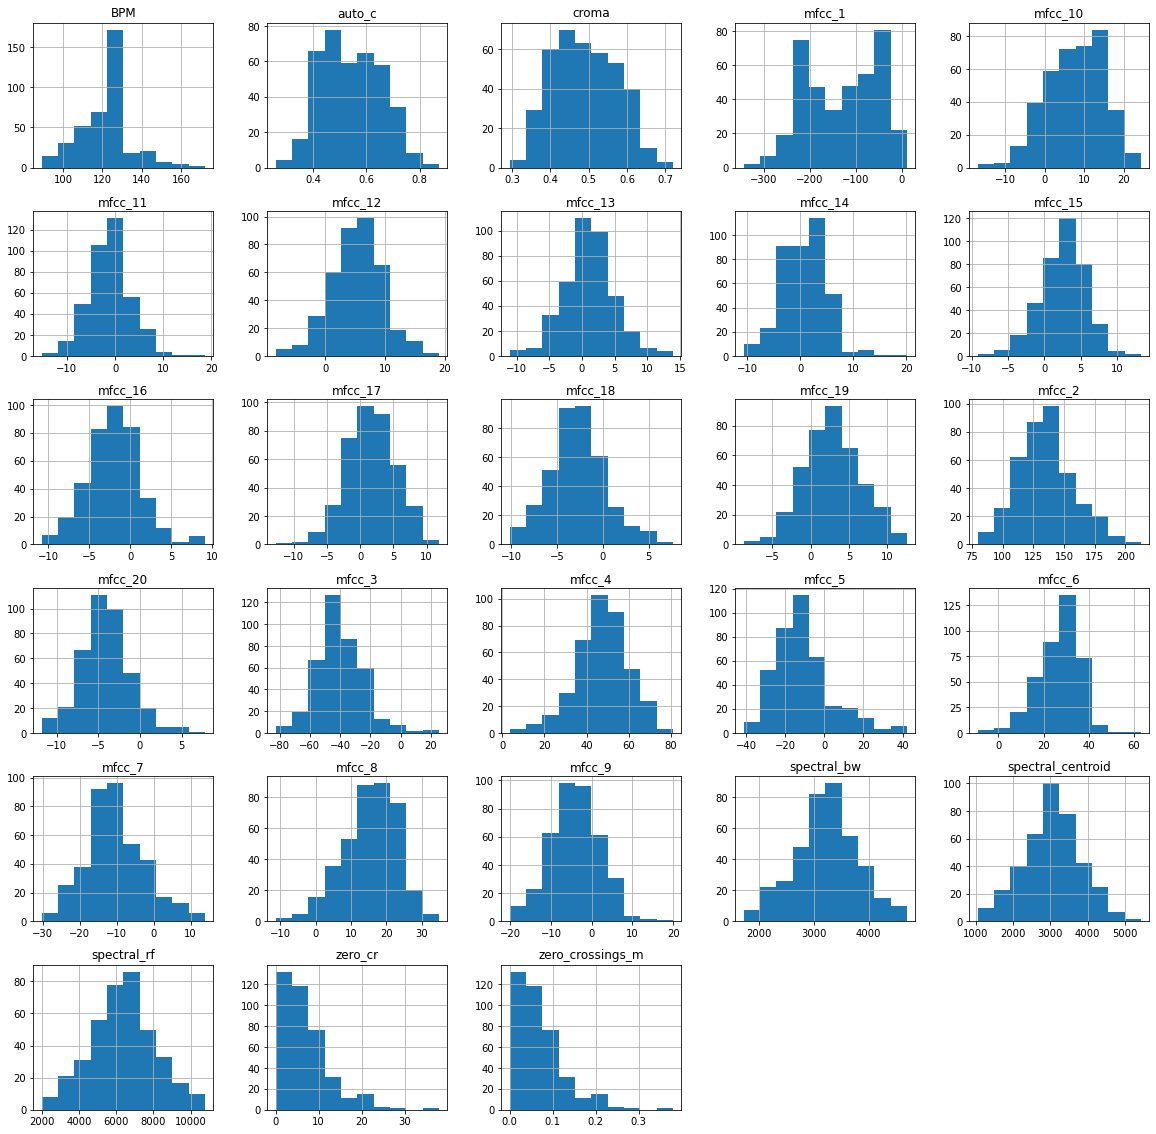

In [142]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

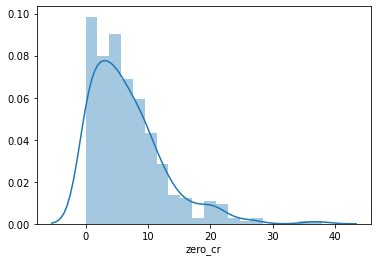

In [144]:
sns.distplot(df['zero_cr'])

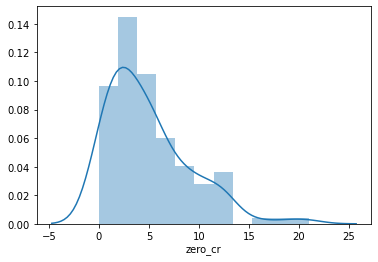

In [145]:
sns.distplot(df_prog['zero_cr'])

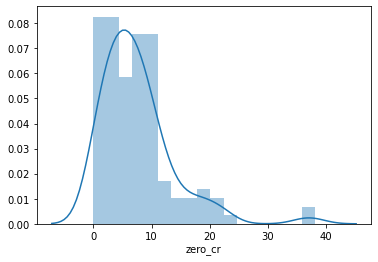

In [146]:
sns.distplot(df_salsa['zero_cr'])

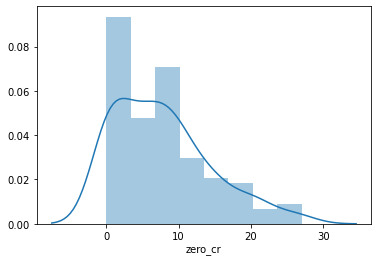

In [147]:
sns.distplot(df_electro['zero_cr'])

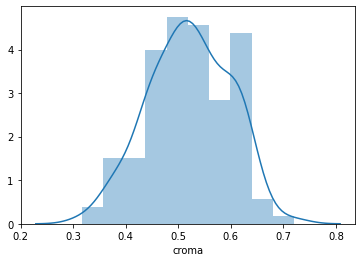

In [160]:
sns.distplot(df_prog['croma'])

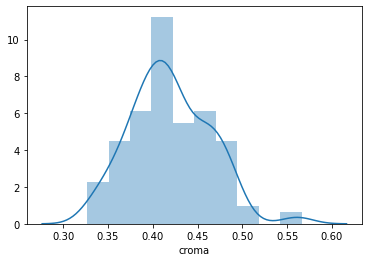

In [161]:
sns.distplot(df_salsa['croma'])

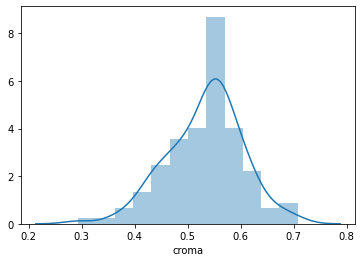

In [162]:
sns.distplot(df_electro['croma'])

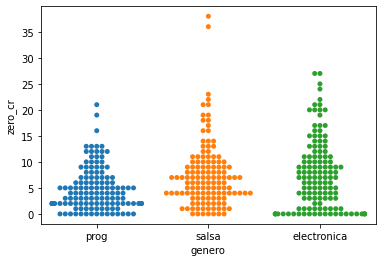

In [149]:
sns.swarmplot(x="genero", y="zero_cr", data=df)

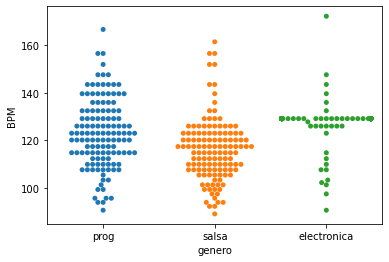

In [151]:
sns.swarmplot(x="genero", y="BPM", data=df)

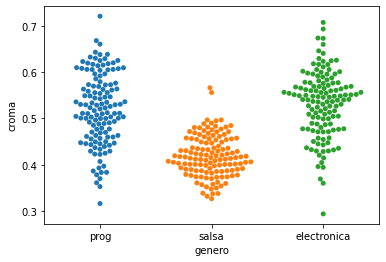

In [152]:
sns.swarmplot(x="genero", y="croma", data=df)

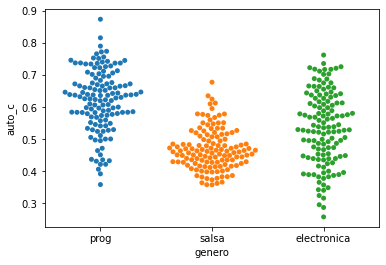

In [153]:
sns.swarmplot(x="genero", y="auto_c", data=df)

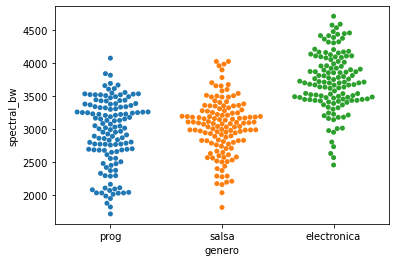

In [163]:
sns.swarmplot(x="genero", y="spectral_bw", data=df)

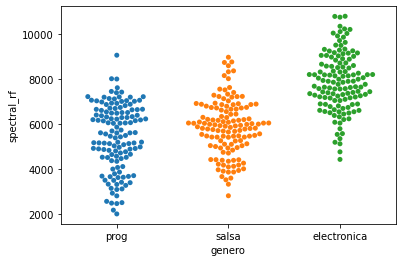

In [164]:
sns.swarmplot(x="genero", y="spectral_rf", data=df)

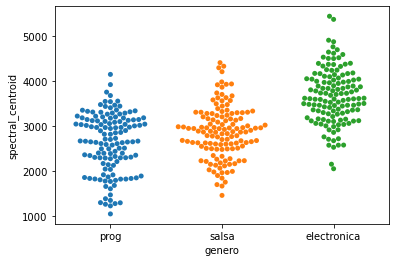

In [165]:
sns.swarmplot(x="genero", y="spectral_centroid", data=df)

In [176]:
df_viz = df[['zero_cr', 'zero_crossings_m', 'spectral_centroid', 'spectral_bw', 'spectral_rf', 'croma', 'BPM', 'auto_c', 'genero']]

In [177]:
df_viz.head()

zero_cr  zero_crossings_m  spectral_centroid  spectral_bw  spectral_rf  \
0        6              0.06        2358.978044  2552.823890  4793.526802   
1        4              0.04        3100.689109  3256.578868  6469.363992   
2        5              0.05        3198.378355  3543.702522  6808.570540   
3        2              0.02        2942.011868  3163.903990  6050.917527   
4        5              0.05        3123.743239  3337.527859  6499.844646   

      croma         BPM    auto_c genero  
0  0.470420  123.046875  0.772140   prog  
1  0.596201  109.956782  0.628546   prog  
2  0.546079  143.554688  0.541958   prog  
3  0.433330   90.666118  0.541528   prog  
4  0.535730  120.185320  0.746078   prog

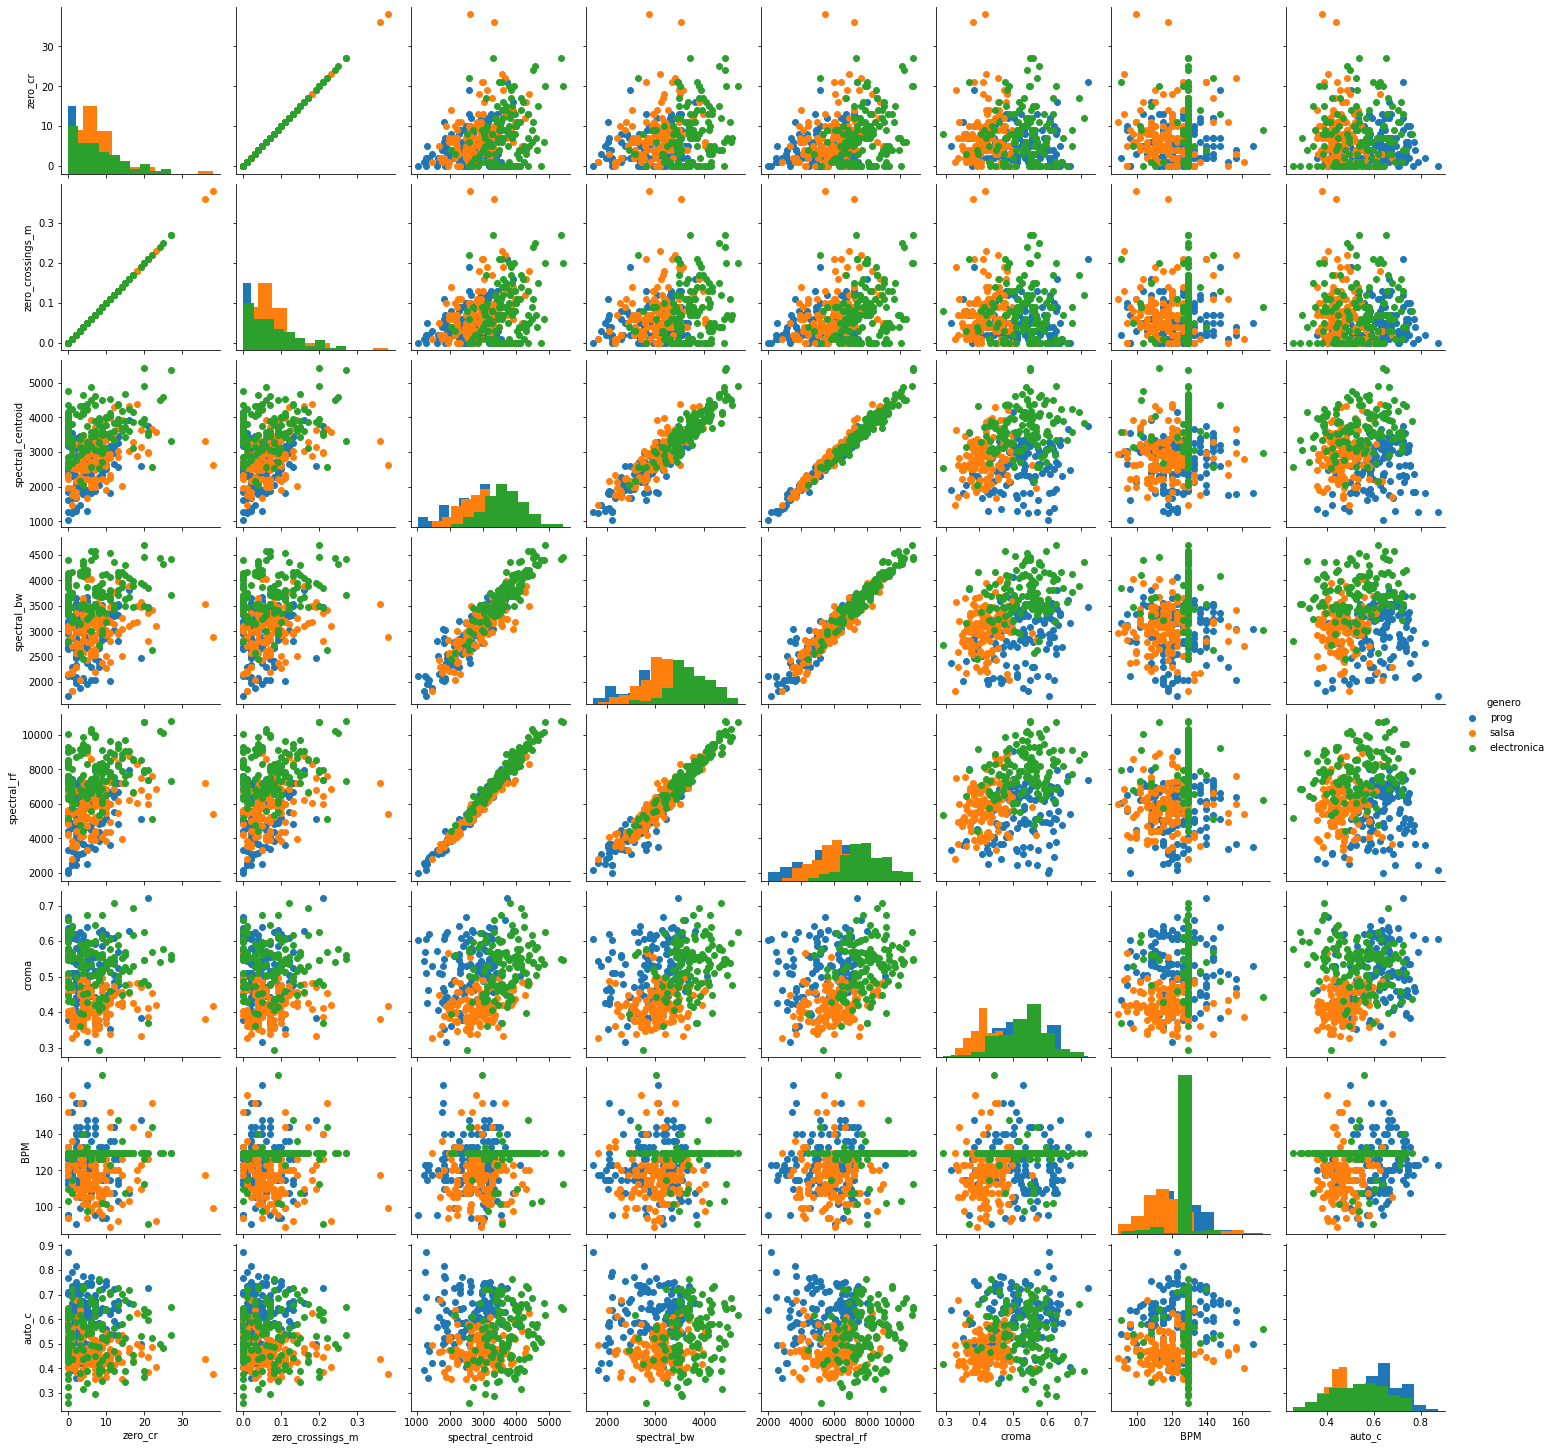

In [178]:
g = sns.PairGrid(df_viz, hue="genero")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

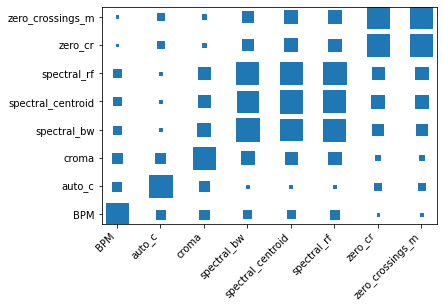

In [183]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num),
        y=y.map(y_to_num), 
        s=size * size_scale, 
        marker='s' 
    )
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
data = df
columns = ['zero_cr', 'zero_crossings_m', 'spectral_centroid', 'spectral_bw', 'spectral_rf', 'croma', 'BPM', 'auto_c'] 
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') 
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)